In [3]:
import skimage, PIL, numpy

import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import utm
import geopandas as gpd
import pandas as pd

# calcul matriciel
import numpy as np
#statistics
import scipy
from scipy import stats
#plot graphique
import matplotlib.pyplot as plt
import seaborn as sns
import osgeo
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
from skimage.segmentation import mark_boundaries
import argparse
from osgeo import gdal


In [54]:
features = ['Terre']
arbre1 = gdal.Open('../data_features/Arbres_Eparses/ae_01.tif')
arbre2 = gdal.Open('../data_features/Arbres_Eparses/ae_02.tif')
Terre1 = gdal.Open('../data_features/Terre/terre_01.tif')
Terre1 = gdal.Open('../data_features/Terre/terre_02.tif')

In [110]:
arbre1 = Image.open('../data_features/Arbres_Eparses/ae_01.tif')
arbre2 = Image.open('../data_features/Arbres_Eparses/ae_02.tif')
Terre1 = Image.open('../data_features/Terre/terre_01.tif')
Terre2 = Image.open('../data_features/Terre/terre_02.tif')
Foret_dense1 = Image.open('../data_features/Foret_dense/Foret_dense_01.tif')
Foret_dense2 = Image.open('../data_features/Foret_dense/Foret_dense_02.tif')
mer1 = Image.open('../data_features/Mer/mer_01.tif')
mer2 = Image.open('../data_features/Mer/mer_02.tif')
mer3 = Image.open('../data_features/Mer/mer_03.tif')
mer4 = Image.open('../data_features/Mer/mer_04.tif')
figs = [arbre1,arbre2,Terre1,Terre2]

In [10]:
# unravel GDAL affine transform parameters
c, a, b, f, d, e = arbre.GetGeoTransform()

def pixel2coord(col, row):
    """Returns global coordinates to pixel center using base-0 raster index"""
    xp = a * col + b * row + a * 0.5 + b * 0.5 + c
    yp = d * col + e * row + d * 0.5 + e * 0.5 + f
    return(xp, yp)

In [12]:
arbre_RGB = arbre_tif.convert('RGB')

In [19]:
matrice = (np.array(arbre_RGB))

In [22]:
matrice.shape

(713, 933, 3)

In [36]:
r = pd.DataFrame(np.ravel(matrice[:,:,0]))
g = pd.DataFrame(np.ravel(matrice[:,:,1]))
b = pd.DataFrame(np.ravel(matrice[:,:,2]))

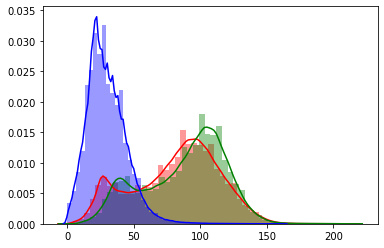

In [37]:
sns.distplot(r,color='r', label = 'Canal Red')
sns.distplot(g,color='g', label = 'Canal Green')
sns.distplot(b,color='b', label = 'Canal Blue')

# Row analysis of histograms of color for different features

In [82]:
def distrib_plot(tif,name):
    #plt.clf()
    #tif = Image.open(fig)
    tif_RGB = tif.convert('RGB')
    matrice = (np.array(tif_RGB))
    r = pd.DataFrame(np.ravel(matrice[:,:,0]))
    g = pd.DataFrame(np.ravel(matrice[:,:,1]))
    b = pd.DataFrame(np.ravel(matrice[:,:,2]))
    sns.distplot(r,color='r', label = 'Canal Red')
    sns.distplot(g,color='g', label = 'Canal Green')
    sns.distplot(b,color='b', label = 'Canal Blue')
    plt.legend()
    plt.title(name)
    plt.savefig(name + '.png')

In [83]:
def distrib_plot_hsv(tif,name):
    #plt.clf()
    #tif = Image.open(fig)
    tif_RGB = tif.convert('HSV')
    matrice = (np.array(tif_RGB))
    r = pd.DataFrame(np.ravel(matrice[:,:,0]))
    g = pd.DataFrame(np.ravel(matrice[:,:,1]))
    b = pd.DataFrame(np.ravel(matrice[:,:,2]))
    sns.distplot(r,color='r', label = 'Canal Hue')
    sns.distplot(g,color='g', label = 'Canal Saturation')
    sns.distplot(b,color='b', label = 'Canal Value')
    plt.legend()
    plt.title(name)
    plt.savefig(name + 'hsv.png')

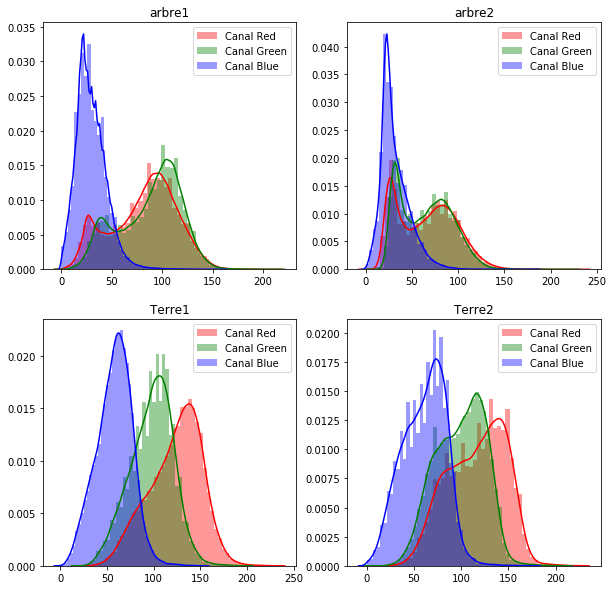

In [84]:
figs = [arbre1,arbre2,Terre1,Terre2]
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
distrib_plot(arbre1,'arbre1')
plt.subplot(2,2,2)
distrib_plot(arbre2,'arbre2')
plt.subplot(2,2,3)
distrib_plot(Terre1,'Terre1')
plt.subplot(2,2,4)
distrib_plot(Terre2,'Terre2')

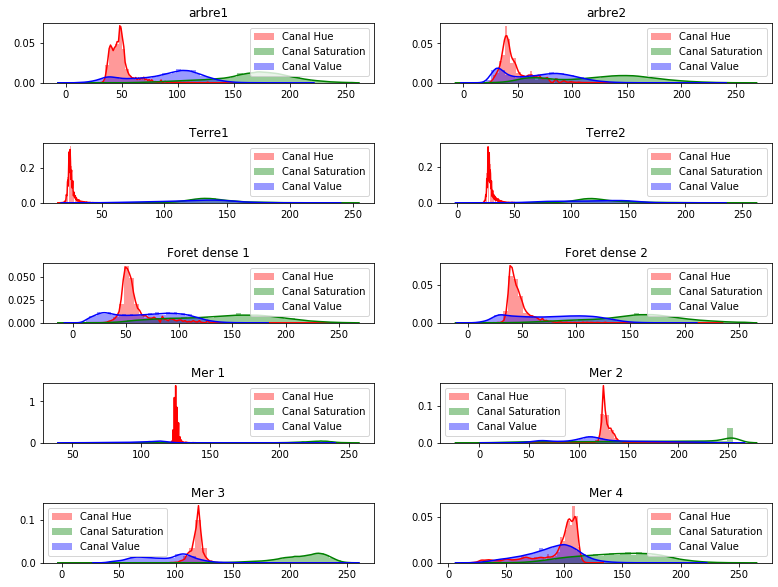

In [111]:
nx = 5
ny = 2
figs = [arbre1,arbre2,Terre1,Terre2]
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=1.5, right=0.8, top=2)
plt.subplot(nx,2,1)
distrib_plot_hsv(arbre1,'arbre1')
plt.subplot(nx,2,2)
distrib_plot_hsv(arbre2,'arbre2')
plt.subplot(nx,2,3)
distrib_plot_hsv(Terre1,'Terre1')
plt.subplot(nx,2,4)
distrib_plot_hsv(Terre2,'Terre2')
plt.subplot(nx,2,5)
distrib_plot_hsv(Foret_dense1,'Foret dense 1')
plt.subplot(nx,2,6)
distrib_plot_hsv(Foret_dense2,'Foret dense 2')
plt.subplot(nx,2,7)
distrib_plot_hsv(mer1,'Mer 1')
plt.subplot(nx,2,8)
distrib_plot_hsv(mer2,'Mer 2')
plt.subplot(nx,2,9)
distrib_plot_hsv(mer3,'Mer 3')
plt.subplot(nx,2,10)
distrib_plot_hsv(mer4,'Mer 4')
plt.subplots_adjust(hspace=1)

# Lissage histogram

convolution avec gaussian distr
filtrage bruit
play avec taille de la fenetre de lissage

# Statistical description

modes, mean, bornes[inf sup] 
distance entre modes de chaque feature
